In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [6]:
#load the dataset
iris = load_iris()
df = pd.DataFrame(
    data = iris.data,
    columns = iris.feature_names
)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#map target number to names
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


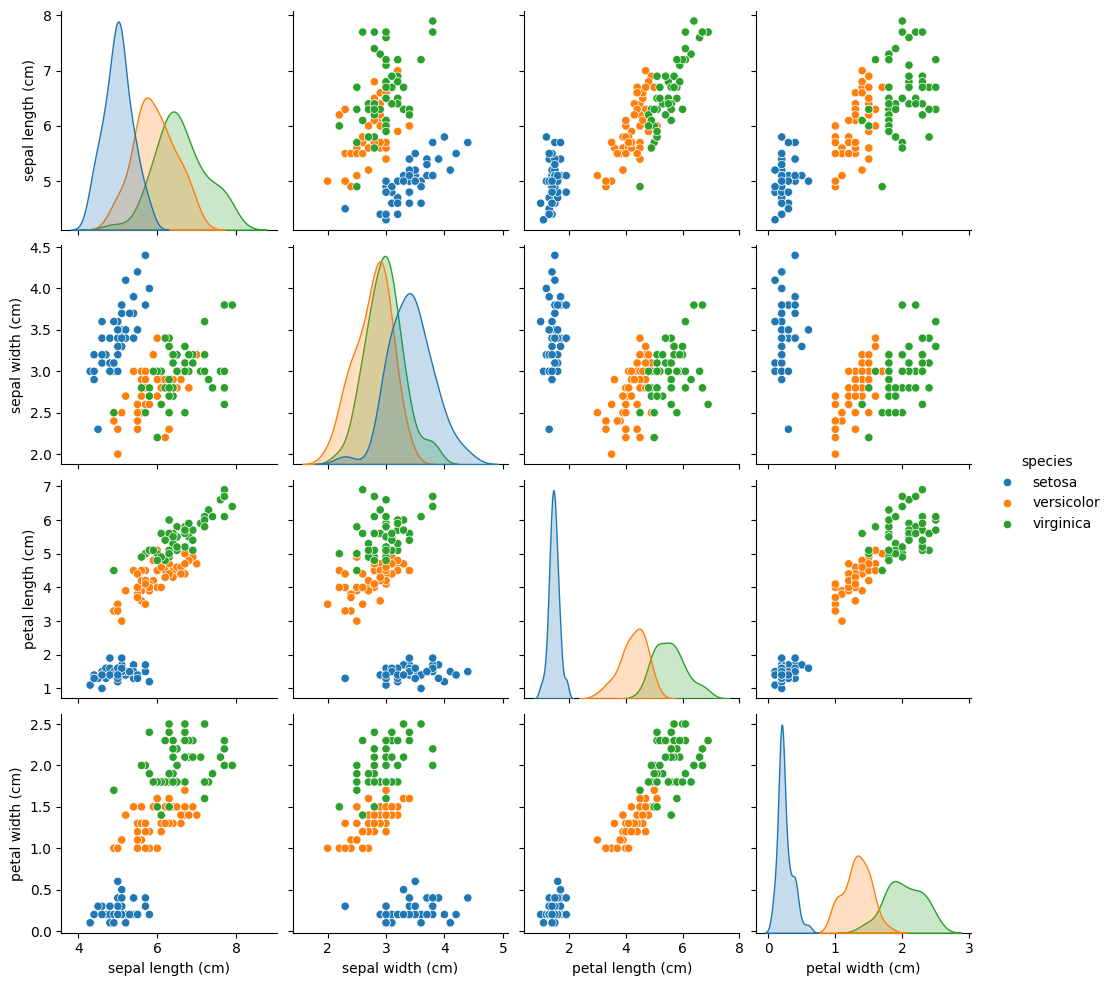

In [9]:
#EDA
sns.pairplot(df, hue='species')
plt.show()

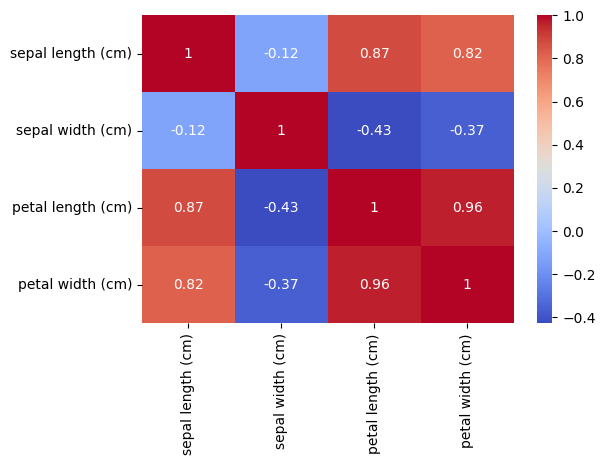

In [12]:
#correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
#train-test split
X = df.drop('species', axis=1)
y = df['species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [15]:
#train the decision tree classifier
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state = 42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [16]:
#make predictions
y_pred = model.predict(X_test)

In [17]:
#evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



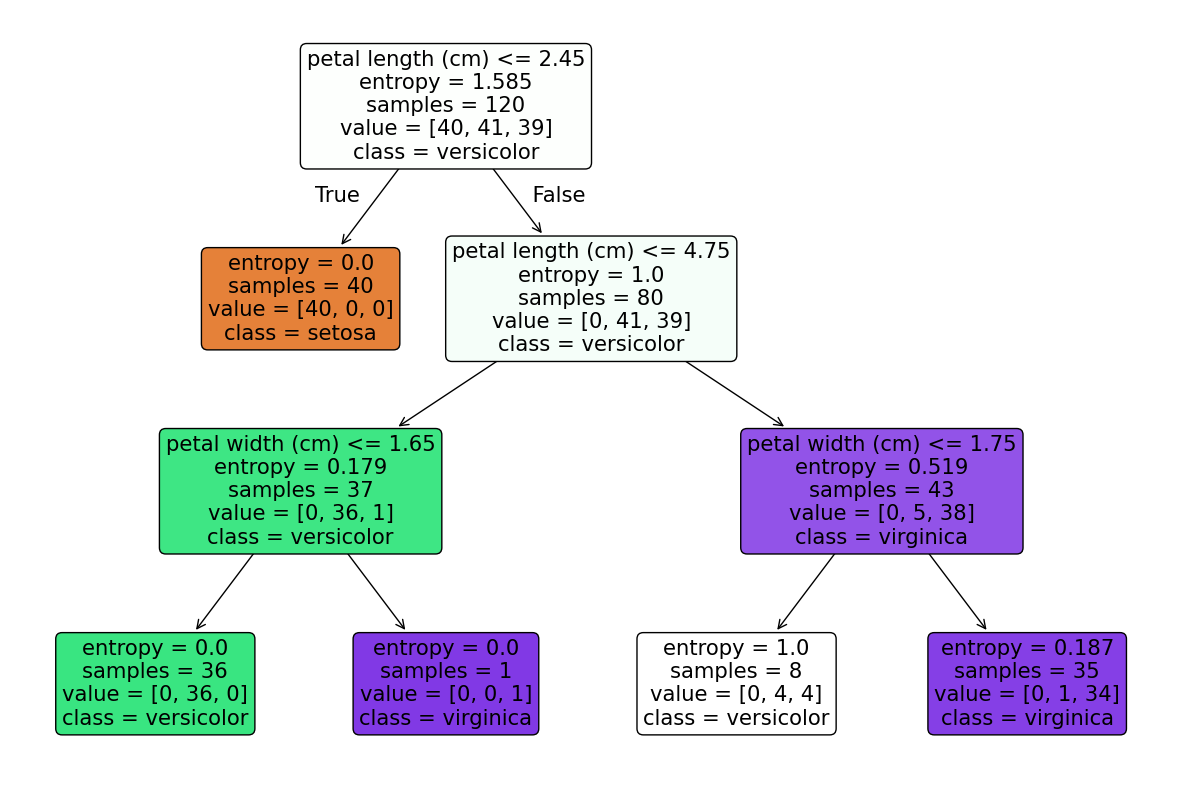

In [18]:
#Visualize the Decison Tree
plt.figure(figsize=(15, 10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names = model.classes_,
    filled = True,
    rounded = True
)
plt.show()

In [20]:
#testing with a custom input
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
prediction = model.predict(sample)
prediction

array(['setosa'], dtype=object)